In [1]:
%cd ..

D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes


In [2]:
cd main5

D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\main5


In [3]:
cd Mask_RCNN

D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\main5\Mask_RCNN


In [4]:
ls

 Volume in drive D is Study
 Volume Serial Number is 16C4-DB1E

 Directory of D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\main5\Mask_RCNN

07-06-2020  11:34    <DIR>          .
07-06-2020  11:34    <DIR>          ..
31-03-2019  23:03               569 .gitignore
07-06-2020  11:53            15,777 clothes.py
02-06-2020  14:49         1,417,321 Fashion_MaskRCNN_V1.ipynb
03-06-2020  16:24         1,414,007 Fashion_MaskRCNN_V2.ipynb
31-03-2019  23:03             1,095 LICENSE
31-03-2019  23:03                58 MANIFEST.in
07-06-2020  11:34    <DIR>          mrcnn
06-06-2020  17:46            15,209 newclothes.py
31-03-2019  23:03            13,771 README.md
31-03-2019  23:03               119 requirements.txt
31-03-2019  23:03                99 setup.cfg
31-03-2019  23:03             2,518 setup.py
              11 File(s)      2,880,543 bytes
               3 Dir(s)  412,316,995,584 bytes free


In [6]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
import skimage.draw
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = "D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\main5\Mask_RCNN"

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import clothes

%matplotlib inline

In [7]:
config = clothes.CustomConfig()
CUSTOM_DIR = r"D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\main5\dataset"

In [8]:
CUSTOM_DIR

'D:\\DCU\\Practicum\\Datasets\\DeepFashion2\\Mask RCNN\\Clothes\\main5\\dataset'

In [9]:
dataset = clothes.CustomDataset()
dataset.load_custom(CUSTOM_DIR, "train")

objects: ['trousers', 'long sleeve outwear']
numids [8, 4]
objects: ['short sleeve top', 'trousers']
numids [1, 8]
objects: ['shorts', 'vest']
numids [7, 5]
objects: ['trousers', 'long sleeve top']
numids [8, 2]
objects: ['short sleeve dress']
numids [10]
objects: ['trousers', 'long sleeve top']
numids [8, 2]
objects: ['skirt']
numids [9]
objects: ['short sleeve top', 'trousers']
numids [1, 8]
objects: ['short sleeve dress']
numids [10]
objects: ['vest dress']
numids [12]
objects: ['skirt', 'vest']
numids [9, 5]
objects: ['shorts', 'short sleeve top']
numids [7, 1]
objects: ['sling dress']
numids [13]
objects: ['short sleeve top']
numids [1]
objects: ['vest dress']
numids [12]
objects: ['skirt', 'short sleeve top']
numids [9, 1]
objects: ['shorts', 'long sleeve top']
numids [7, 2]
objects: ['shorts']
numids [7]
objects: ['trousers', 'long sleeve top']
numids [8, 2]
objects: ['short sleeve top']
numids [1]
objects: ['skirt', 'long sleeve outwear']
numids [9, 4]
objects: ['trousers', 'lo

In [10]:
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 100
Class Count: 14
  0. BG                                                
  1. short sleeve top                                  
  2. long sleeve top                                   
  3. short sleeve outwear                              
  4. long sleeve outwear                               
  5. vest                                              
  6. sling                                             
  7. shorts                                            
  8. trousers                                          
  9. skirt                                             
 10. short sleeve dress                                
 11. long sleeve dress                                 
 12. vest dress                                        
 13. sling dress                                       


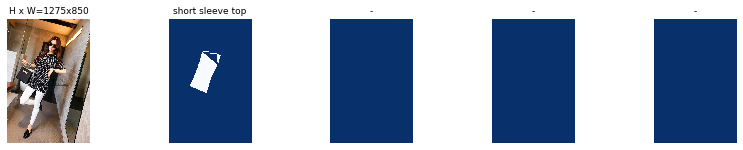

In [12]:
# Load and display random samples
image_ids ="023241.jpg"# np.random.choice(dataset.image_ids, 4)
#for image_id in image_ids:
image = dataset.load_image(image_id)
mask, num_ids = dataset.load_mask(image_id)
visualize.display_top_masks(image, mask, num_ids, dataset.class_names)

image_id  83 D:\DCU\Practicum\Datasets\DeepFashion2\Mask RCNN\Clothes\main5\dataset\train\160144.jpg
image                    shape: (702, 468, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (702, 468, 2)         min:    0.00000  max:    1.00000  uint8
class_ids                shape: (2,)                  min:    2.00000  max:    7.00000  int32
bbox                     shape: (2, 4)                min:    0.00000  max:  520.00000  int32


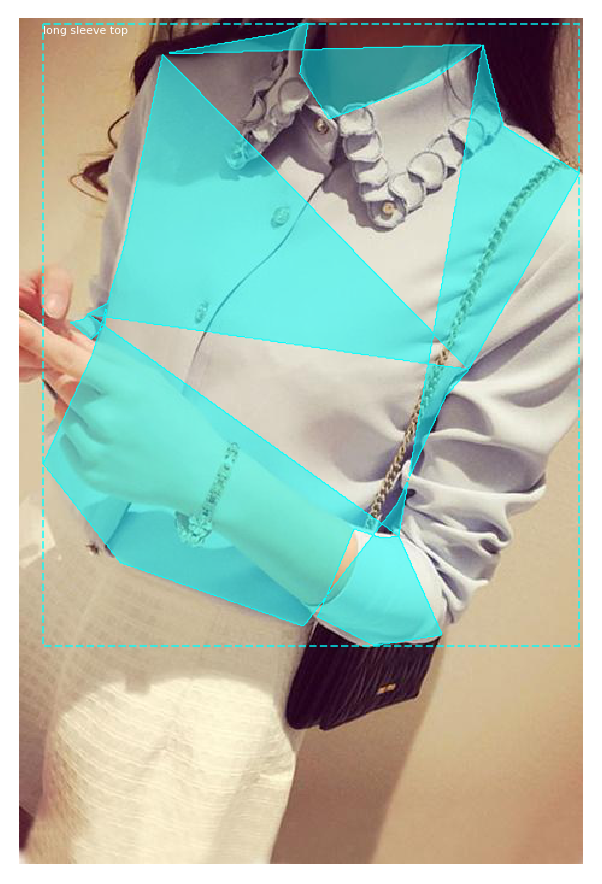

In [14]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)